# Entregable 1: Conexión a API pública

#### Nos conectaremos a una API pública que contiene datos sobre videojuegos gratis

In [1]:
import pandas as pd
import requests

url = 'https://www.freetogame.com/api/games'
r = requests.get(url)

In [2]:
r

<Response [200]>

In [3]:
json = r.json()

In [4]:
# Convierto el resultado en un dataframe
df = pd.json_normalize(json)

In [5]:
df

,id,title,thumbnail,short_description,game_url,genre,platform,publisher,developer,release_date,freetogame_profile_url
0,540,Overwatch 2,https://www.freetogame.com/g/540/thumbnail.jpg,A hero-focused first-person team shooter from ...,https://www.freetogame.com/open/overwatch-2,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04,https://www.freetogame.com/overwatch-2
1,521,Diablo Immortal,https://www.freetogame.com/g/521/thumbnail.jpg,"Built for mobile and also released on PC, Diab...",https://www.freetogame.com/open/diablo-immortal,MMOARPG,PC (Windows),Blizzard Entertainment,Blizzard Entertainment,2022-06-02,https://www.freetogame.com/diablo-immortal
2,517,Lost Ark,https://www.freetogame.com/g/517/thumbnail.jpg,Smilegate’s free-to-play multiplayer ARPG is a...,https://www.freetogame.com/open/lost-ark,ARPG,PC (Windows),Amazon Games,Smilegate RPG,2022-02-11,https://www.freetogame.com/lost-ark
3,516,PUBG: BATTLEGROUNDS,https://www.freetogame.com/g/516/thumbnail.jpg,Get into the action in one of the longest runn...,https://www.freetogame.com/open/pubg,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12,https://www.freetogame.com/pubg
4,508,Enlisted,https://www.freetogame.com/g/508/thumbnail.jpg,Get ready to command your own World War II mil...,https://www.freetogame.com/open/enlisted,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08,https://www.freetogame.com/enlisted
...,...,...,...,...,...,...,...,...,...,...,...
371,17,Entropia Universe,https://www.freetogame.com/g/17/thumbnail.jpg,A 3D MMO Multi Virtual World Real Cash Economy...,https://www.freetogame.com/open/entropia-universe,MMORPG,PC (Windows),MindArk,MindArk,2003-01-30,https://www.freetogame.com/entropia-universe
372,432,Habbo,https://www.freetogame.com/g/432/thumbnail.jpg,One of the largest and most popular Social MMO.,https://www.freetogame.com/open/habbo,Social,Web Browser,Sulake Corporation,Sulake Corporation,2001-09-26,https://www.freetogame.com/habbo
373,336,Anarchy Online,https://www.freetogame.com/g/336/thumbnail.jpg,A free to play Sci-Fi MMO that has withstood t...,https://www.freetogame.com/open/anarchy-online,MMORPG,PC (Windows),Funcom,Funcom,2001-06-27,https://www.freetogame.com/anarchy-online
374,251,The Lord of the Rings Online,https://www.freetogame.com/g/251/thumbnail.jpg,A free to play MMORPG set in the world of J.R....,https://www.freetogame.com/open/lotro,MMORPG,PC (Windows),Warner Bros. Interactive Entertainment,"Turbine, Inc.",2001-04-24,https://www.freetogame.com/lotro


In [6]:
# Elimino columnas innecesarias
df = df.drop(['thumbnail','game_url'], axis=1)
df.head()

,id,title,short_description,genre,platform,publisher,developer,release_date,freetogame_profile_url
0,540,Overwatch 2,A hero-focused first-person team shooter from ...,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04,https://www.freetogame.com/overwatch-2
1,521,Diablo Immortal,"Built for mobile and also released on PC, Diab...",MMOARPG,PC (Windows),Blizzard Entertainment,Blizzard Entertainment,2022-06-02,https://www.freetogame.com/diablo-immortal
2,517,Lost Ark,Smilegate’s free-to-play multiplayer ARPG is a...,ARPG,PC (Windows),Amazon Games,Smilegate RPG,2022-02-11,https://www.freetogame.com/lost-ark
3,516,PUBG: BATTLEGROUNDS,Get into the action in one of the longest runn...,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12,https://www.freetogame.com/pubg
4,508,Enlisted,Get ready to command your own World War II mil...,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08,https://www.freetogame.com/enlisted


In [7]:
# Genero una columna de precio random entre 0 y 50 para tener algún valor numérico
import numpy as np

df['price'] = (np.random.rand(len(df),1).round(3) )*50

In [8]:
# Cambio columna release_date a formato de fecha
df["release_date"] = pd.to_datetime(df['release_date'], format='%Y-%m-%d', errors='coerce')

In [9]:
# Reemplazo los NaT que haya generado la celda anterior por null
df.replace({pd.NaT: None}, inplace=True)

In [10]:
df

,id,title,short_description,genre,platform,publisher,developer,release_date,freetogame_profile_url,price
0,540,Overwatch 2,A hero-focused first-person team shooter from ...,Shooter,PC (Windows),Activision Blizzard,Blizzard Entertainment,2022-10-04 00:00:00,https://www.freetogame.com/overwatch-2,3.80
1,521,Diablo Immortal,"Built for mobile and also released on PC, Diab...",MMOARPG,PC (Windows),Blizzard Entertainment,Blizzard Entertainment,2022-06-02 00:00:00,https://www.freetogame.com/diablo-immortal,0.40
2,517,Lost Ark,Smilegate’s free-to-play multiplayer ARPG is a...,ARPG,PC (Windows),Amazon Games,Smilegate RPG,2022-02-11 00:00:00,https://www.freetogame.com/lost-ark,23.20
3,516,PUBG: BATTLEGROUNDS,Get into the action in one of the longest runn...,Shooter,PC (Windows),"KRAFTON, Inc.","KRAFTON, Inc.",2022-01-12 00:00:00,https://www.freetogame.com/pubg,29.80
4,508,Enlisted,Get ready to command your own World War II mil...,Shooter,PC (Windows),Gaijin Entertainment,Darkflow Software,2021-04-08 00:00:00,https://www.freetogame.com/enlisted,39.30
...,...,...,...,...,...,...,...,...,...,...
371,17,Entropia Universe,A 3D MMO Multi Virtual World Real Cash Economy...,MMORPG,PC (Windows),MindArk,MindArk,2003-01-30 00:00:00,https://www.freetogame.com/entropia-universe,23.75
372,432,Habbo,One of the largest and most popular Social MMO.,Social,Web Browser,Sulake Corporation,Sulake Corporation,2001-09-26 00:00:00,https://www.freetogame.com/habbo,34.95
373,336,Anarchy Online,A free to play Sci-Fi MMO that has withstood t...,MMORPG,PC (Windows),Funcom,Funcom,2001-06-27 00:00:00,https://www.freetogame.com/anarchy-online,24.85
374,251,The Lord of the Rings Online,A free to play MMORPG set in the world of J.R....,MMORPG,PC (Windows),Warner Bros. Interactive Entertainment,"Turbine, Inc.",2001-04-24 00:00:00,https://www.freetogame.com/lotro,26.90


In [11]:
# Verifico si hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      376 non-null    int64  
 1   title                   376 non-null    object 
 2   short_description       376 non-null    object 
 3   genre                   376 non-null    object 
 4   platform                376 non-null    object 
 5   publisher               376 non-null    object 
 6   developer               376 non-null    object 
 7   release_date            374 non-null    object 
 8   freetogame_profile_url  376 non-null    object 
 9   price                   376 non-null    float64
dtypes: float64(1), int64(1), object(8)
memory usage: 29.5+ KB


#### Vemos que la columna de fecha tiene dos valores nulos

In [12]:
# Verifico que la columna id no tenga duplicados
df['id'].duplicated().any()

False

In [13]:
# Verifico que la columna title no tenga duplicados
df['title'].duplicated().any()

False

## Gráficos

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

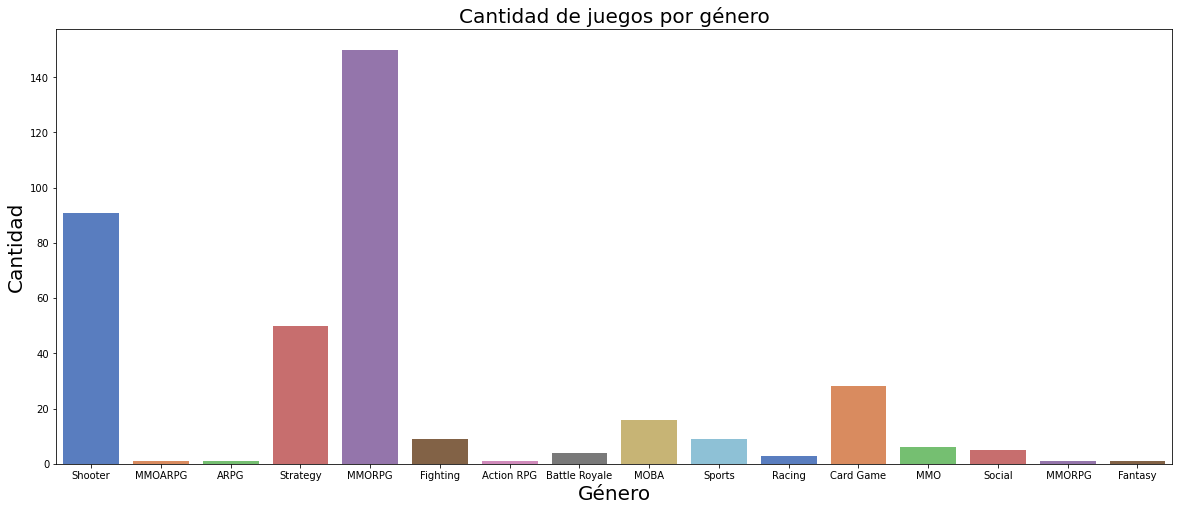

In [15]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=df,
                  x="genre",
                  palette = "muted",
                 )

plt.title('Cantidad de juegos por género', size = 20)
plt.xlabel("Género", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

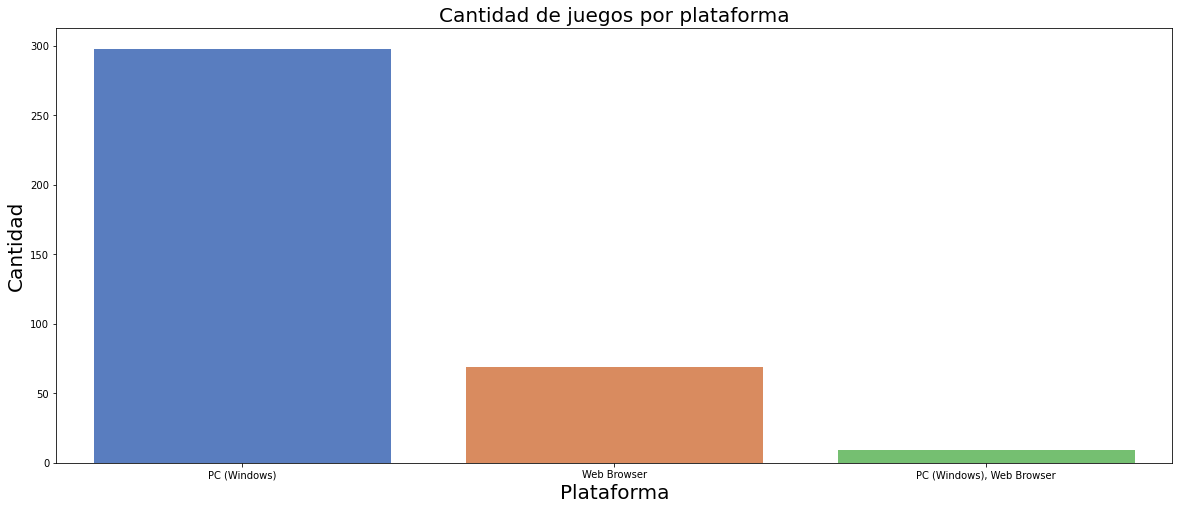

In [16]:
plt.figure(figsize=(20,8))

g = sns.countplot(data=df,
                  x="platform",
                  palette = "muted",
                 )

plt.title('Cantidad de juegos por plataforma', size = 20)
plt.xlabel("Plataforma", size = 20)
plt.ylabel("Cantidad", size = 20)
plt.show()

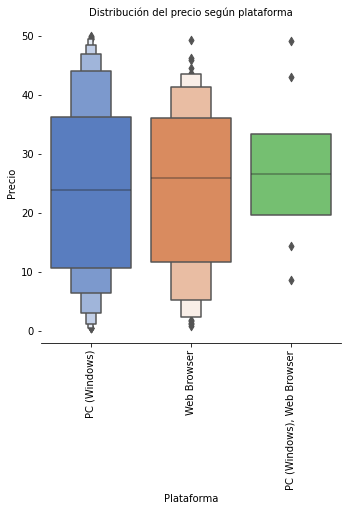

In [17]:
g = sns.catplot(data=df,
                x="platform",y="price", 
                kind="boxen",
                palette = "muted",
                height = 5 ,aspect=1)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Plataforma",size = 10)
plt.ylabel("Precio",size =10)
plt.title('Distribución del precio según plataforma',size =10)
plt.show()

# Entregable 2: Conexión a Redshift

In [18]:
import psycopg2
import psycopg2.extras as extras
import os
from dotenv import load_dotenv

load_dotenv()

conn = psycopg2.connect(
    database=os.getenv('REDSHIFT_DATABASE'), user=os.getenv('REDSHIFT_USER'), password=os.getenv('REDSHIFT_PASS'), host=os.getenv('REDSHIFT_HOST'), port=int(os.getenv('REDSHIFT_PORT'))
)

cursor = conn.cursor()

query = """CREATE TABLE IF NOT EXISTS free_games ( 

id INT NOT NULL DISTKEY, 

title VARCHAR(1000),

short_description VARCHAR(1000),

genre VARCHAR,

platform VARCHAR,

publisher VARCHAR,

developer VARCHAR,

release_date DATE SORTKEY,

freetogame_profile_url VARCHAR(1000),

price FLOAT8,

UNIQUE (id)

)"""
    
cursor.execute(query)
conn.commit()

In [19]:
def execute_values(conn, df, table):
  
    tuples = [tuple(x) for x in df.to_numpy()]
  
    cols = ','.join(list(df.columns))
    # SQL query
    query = "INSERT INTO %s(%s) VALUES %%s" % (table, cols)
    cursor = conn.cursor()
    try:
        extras.execute_values(cursor, query, tuples)
        conn.commit()
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    print("the dataframe is inserted")
    cursor.close()
  
  
df_original = pd.read_sql(f"select * from free_games", conn)

if len(df_original. index) > 0:
    df_all = df.merge(df_original.drop_duplicates(), on=['id'], how='left', indicator=True)

    df1_only = df_all[df_all['_merge'] == 'left_only']
else:
    df1_only = df


execute_values(conn, df1_only, 'free_games')

the dataframe is inserted


In [20]:
# Verifico que se haya cargado correctamente
pd.read_sql("select * from free_games", conn)

,id,title,short_description,genre,platform,publisher,developer,release_date,freetogame_profile_url,price
0,380,Dark Orbit Reloaded,A browser-based 3D space-combat MMO with a mas...,Shooter,Web Browser,Bigpoint,Bigpoint,2006-12-11,https://www.freetogame.com/darkorbit,23.20
1,14,Star Trek Online,"A free-to-play, 3D, Sci-Fi MMORPG based on the...",MMORPG,PC (Windows),Perfect World Entertainment,Cryptic Studios,2010-02-02,https://www.freetogame.com/star-trek-online,17.50
2,427,Drakensang Online,A free to play browser-based top-down hack-and...,MMORPG,Web Browser,Bigpoint,Bigpoint,2011-08-08,https://www.freetogame.com/drakensang-online,35.60
3,345,Forge of Empires,A free to play 2D browser-based online strateg...,Strategy,Web Browser,InnoGames,InnoGames,2012-04-17,https://www.freetogame.com/forge-of-empires,27.50
4,13,Guild Wars 2,"A free-to-play MMORPG, the follow-up to ArenaN...",MMORPG,PC (Windows),NCsoft,ArenaNet,2012-08-28,https://www.freetogame.com/guild-wars-2,26.00
...,...,...,...,...,...,...,...,...,...,...
371,274,GetAmped 2,"A free to play fighting MMO, experience franti...",Fighting,PC (Windows),CyberStep,CyberStep,2010-12-16,https://www.freetogame.com/getamped-2,22.90
372,205,Elsword,A Free to Play 3D side scrolling action MMORPG...,MMORPG,PC (Windows),KOG Games,KOG,2011-03-23,https://www.freetogame.com/elsword,10.15
373,60,Brink,A free-to-play first-person-shoot developed by...,Shooter,PC (Windows),Bethesda Softworks,Splash Damage,2011-05-09,https://www.freetogame.com/brink,31.85
374,271,Asda Global,A 3D anime-inspired fantasy MMORPG and is the ...,MMORPG,PC (Windows),GamenGame,Maxonsoft,2011-05-19,https://www.freetogame.com/asda-global,45.95


In [21]:
# Veo los dos juegos que tienen fecha nula
pd.read_sql("select * from free_games where release_date is null", conn)

,id,title,short_description,genre,platform,publisher,developer,release_date,freetogame_profile_url,price
0,405,Pocket Starships,A free-to-play cross-platform space combat MMO...,Strategy,Web Browser,Spyr,Spyr,None,https://www.freetogame.com/pocket-starships,39.35
1,429,Astro Empires,A text-based sci-fi strategy and diplomacy MMO...,Strategy,Web Browser,Cybertopia,Cybertopia,None,https://www.freetogame.com/astro-empires,10.05


In [22]:
conn.close()